Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Jakub Warmuz"
COLLABORATORS = ""

---


# CS110 Fall 2019 - Assignment 1
# Divide and Conquer Sorting Algorithms

This assignment focuses on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 

Every CS110 assignment begins with a check-up on your class responsibilities and professional standing, as well as your ability to address one of the course LOs #ComputationalSolutions. Thus to complete the first part of this assignment, you will need to take a screenshot of your CS110 dashboard on Forum where the following is visible:
your name.
your absences for the course have been set to excused up to session 2.2 (inclusively).
This will be evidence that you have submitted acceptable pre-class and make-up work for a CS110 session you may have missed. Check the specific CS110 make-up and pre-class policies in the syllabus of the course.


**NOTES:**

1. Your assignment submission needs to include the following resources:
    * A PDF file must be the first resource. This file must be generated from the template notebook where you have written all of the answers (check this link for instructions on how to do this). Make sure that the PDF displays properly (all text and code can be seen within the paper margins).
    * Make sure that you submit a neat, clearly presented, and easy-to-read PDF. Please make sure to include page numbers
    * Your second resource must be the template notebook you have downloaded from the gist provided and where you included your answers. Submit this file directly following the directions in this picture:

<img src="images/upload.png" width="800" height="200">


2. Questions (1)-(7) will be graded on the indicated LOs, please make sure to consult their descriptions and rubrics in the course syllabus. You will not be penalized for not attempting the optional challenge.

3. After completing the assignment, evaluate the application of the HCs you have identified prior to and while you were working on this assignment and footnote them (refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work). 
Here are some examples of weak applications of some of the relevant HCs:

    * Example 1: “#algorithms: I wrote an implementation of the Bubble sort”. 
        * This is an extremely superficial use of the HC in a course on Algorithms, and your reference will be graded accordingly. Instead, consider what constitutes an algorithm (see Cormen et al, sections 1.1 and 1.2). Once you have a good definition of an algorithm, think of how this notion helped you approach the implementation of the algorithm, analyze its complexity and understand why it’s important to write an optimal python implementation of the algorithm.
    * Example 2: “#dataviz: I plotted nice curves showing the execution time of bubble sort, or I plotted beautiful curves with different colors and labels.”
        * Again, these two examples are very superficial uses of the HC #dataviz. Instead consider writing down how do the plots and figures helped you interpret, analyze and write concluding remarks from your experiments. Or write about any insight you included in your work that came from being able to visualize the curves.
    * Example 3: “#professionalism: I wrote a nice paper/article that follows all the directions in this assignment.” 
        * By now, you should realize that this is a poor application of the HC #professionalism. Instead, comment on how you actively considered the HC while deciding on the format, length, and style for writing your report.

4. Your code will be tested for similarity using Turnitin, both to other students’ work and examples available online. As such, be sure to cite all references that you used in devising your solution. Any plagiarism attempts will be referred to the ASC.


** Complete the following tasks which will be graded in the designated LOs and foregrounded HCs:**

## Question 1. [HCs #responsibility and #professionalism; #ComputationalSolutions]

Submit a PDF file with a screenshot of your CS110 dashboard with the information described above.



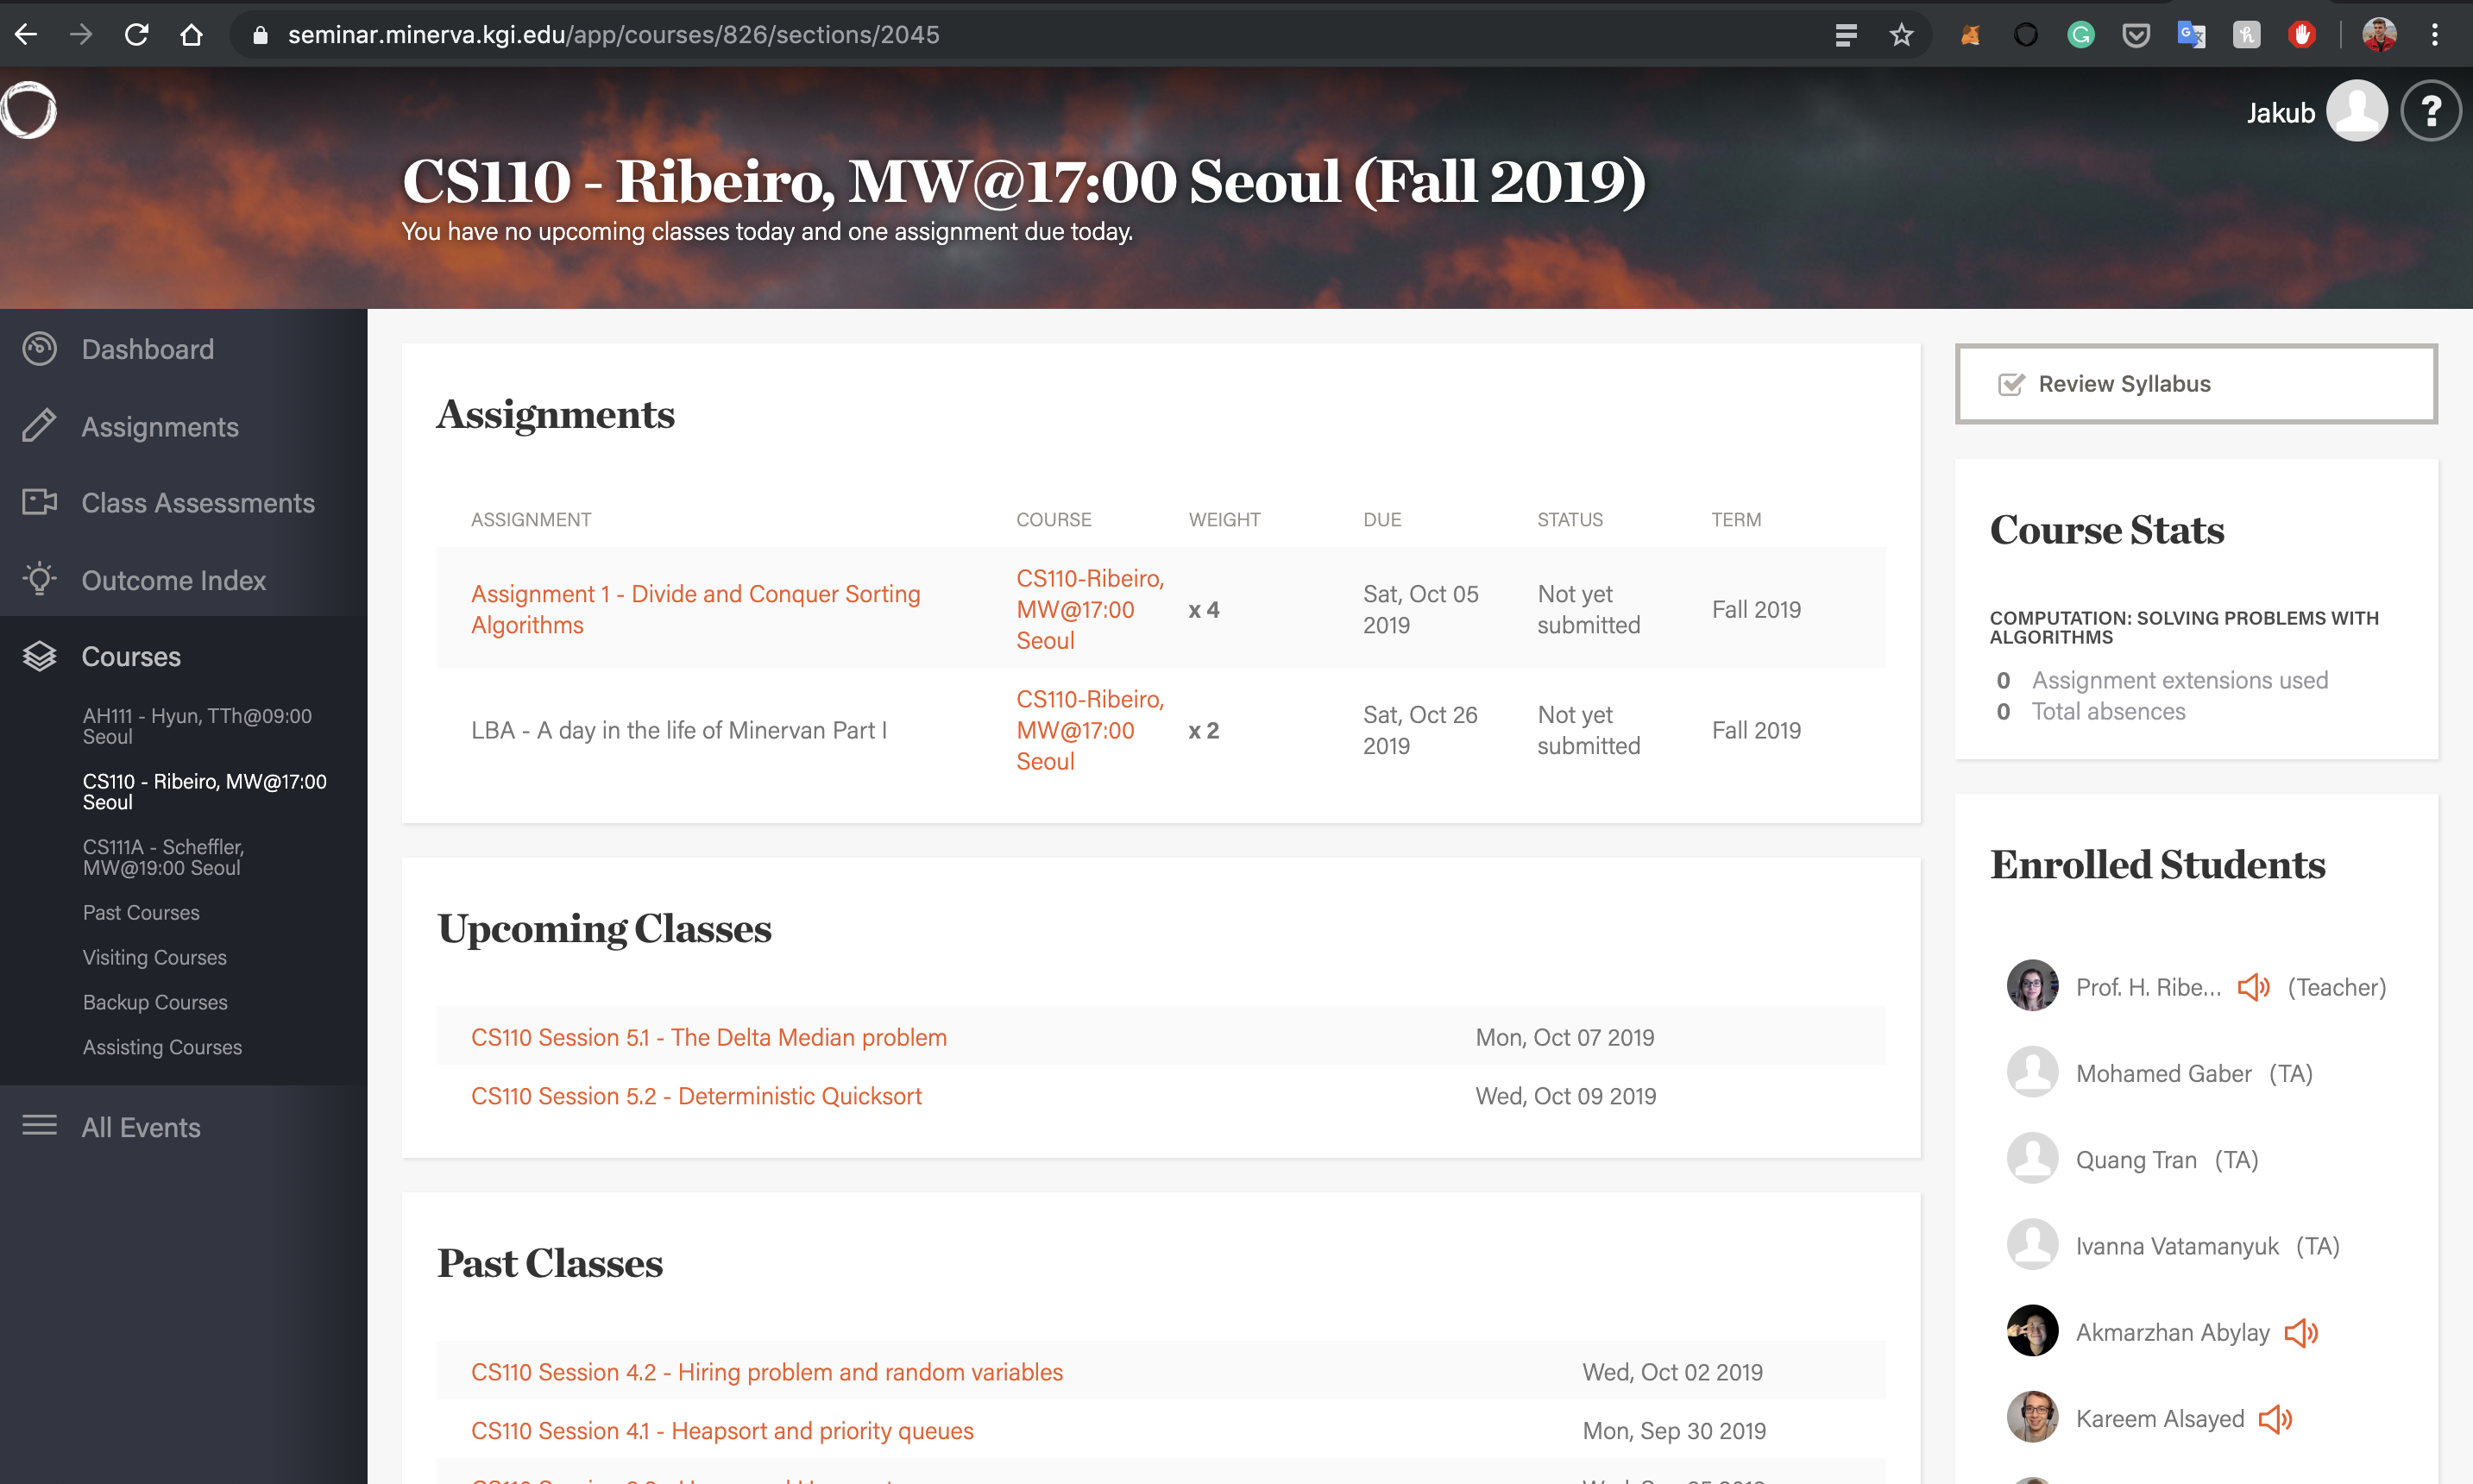

In [2]:
from IPython.display import Image
Image("CS110 Dashboard Screenshot.png")
#raise NotImplementedError()

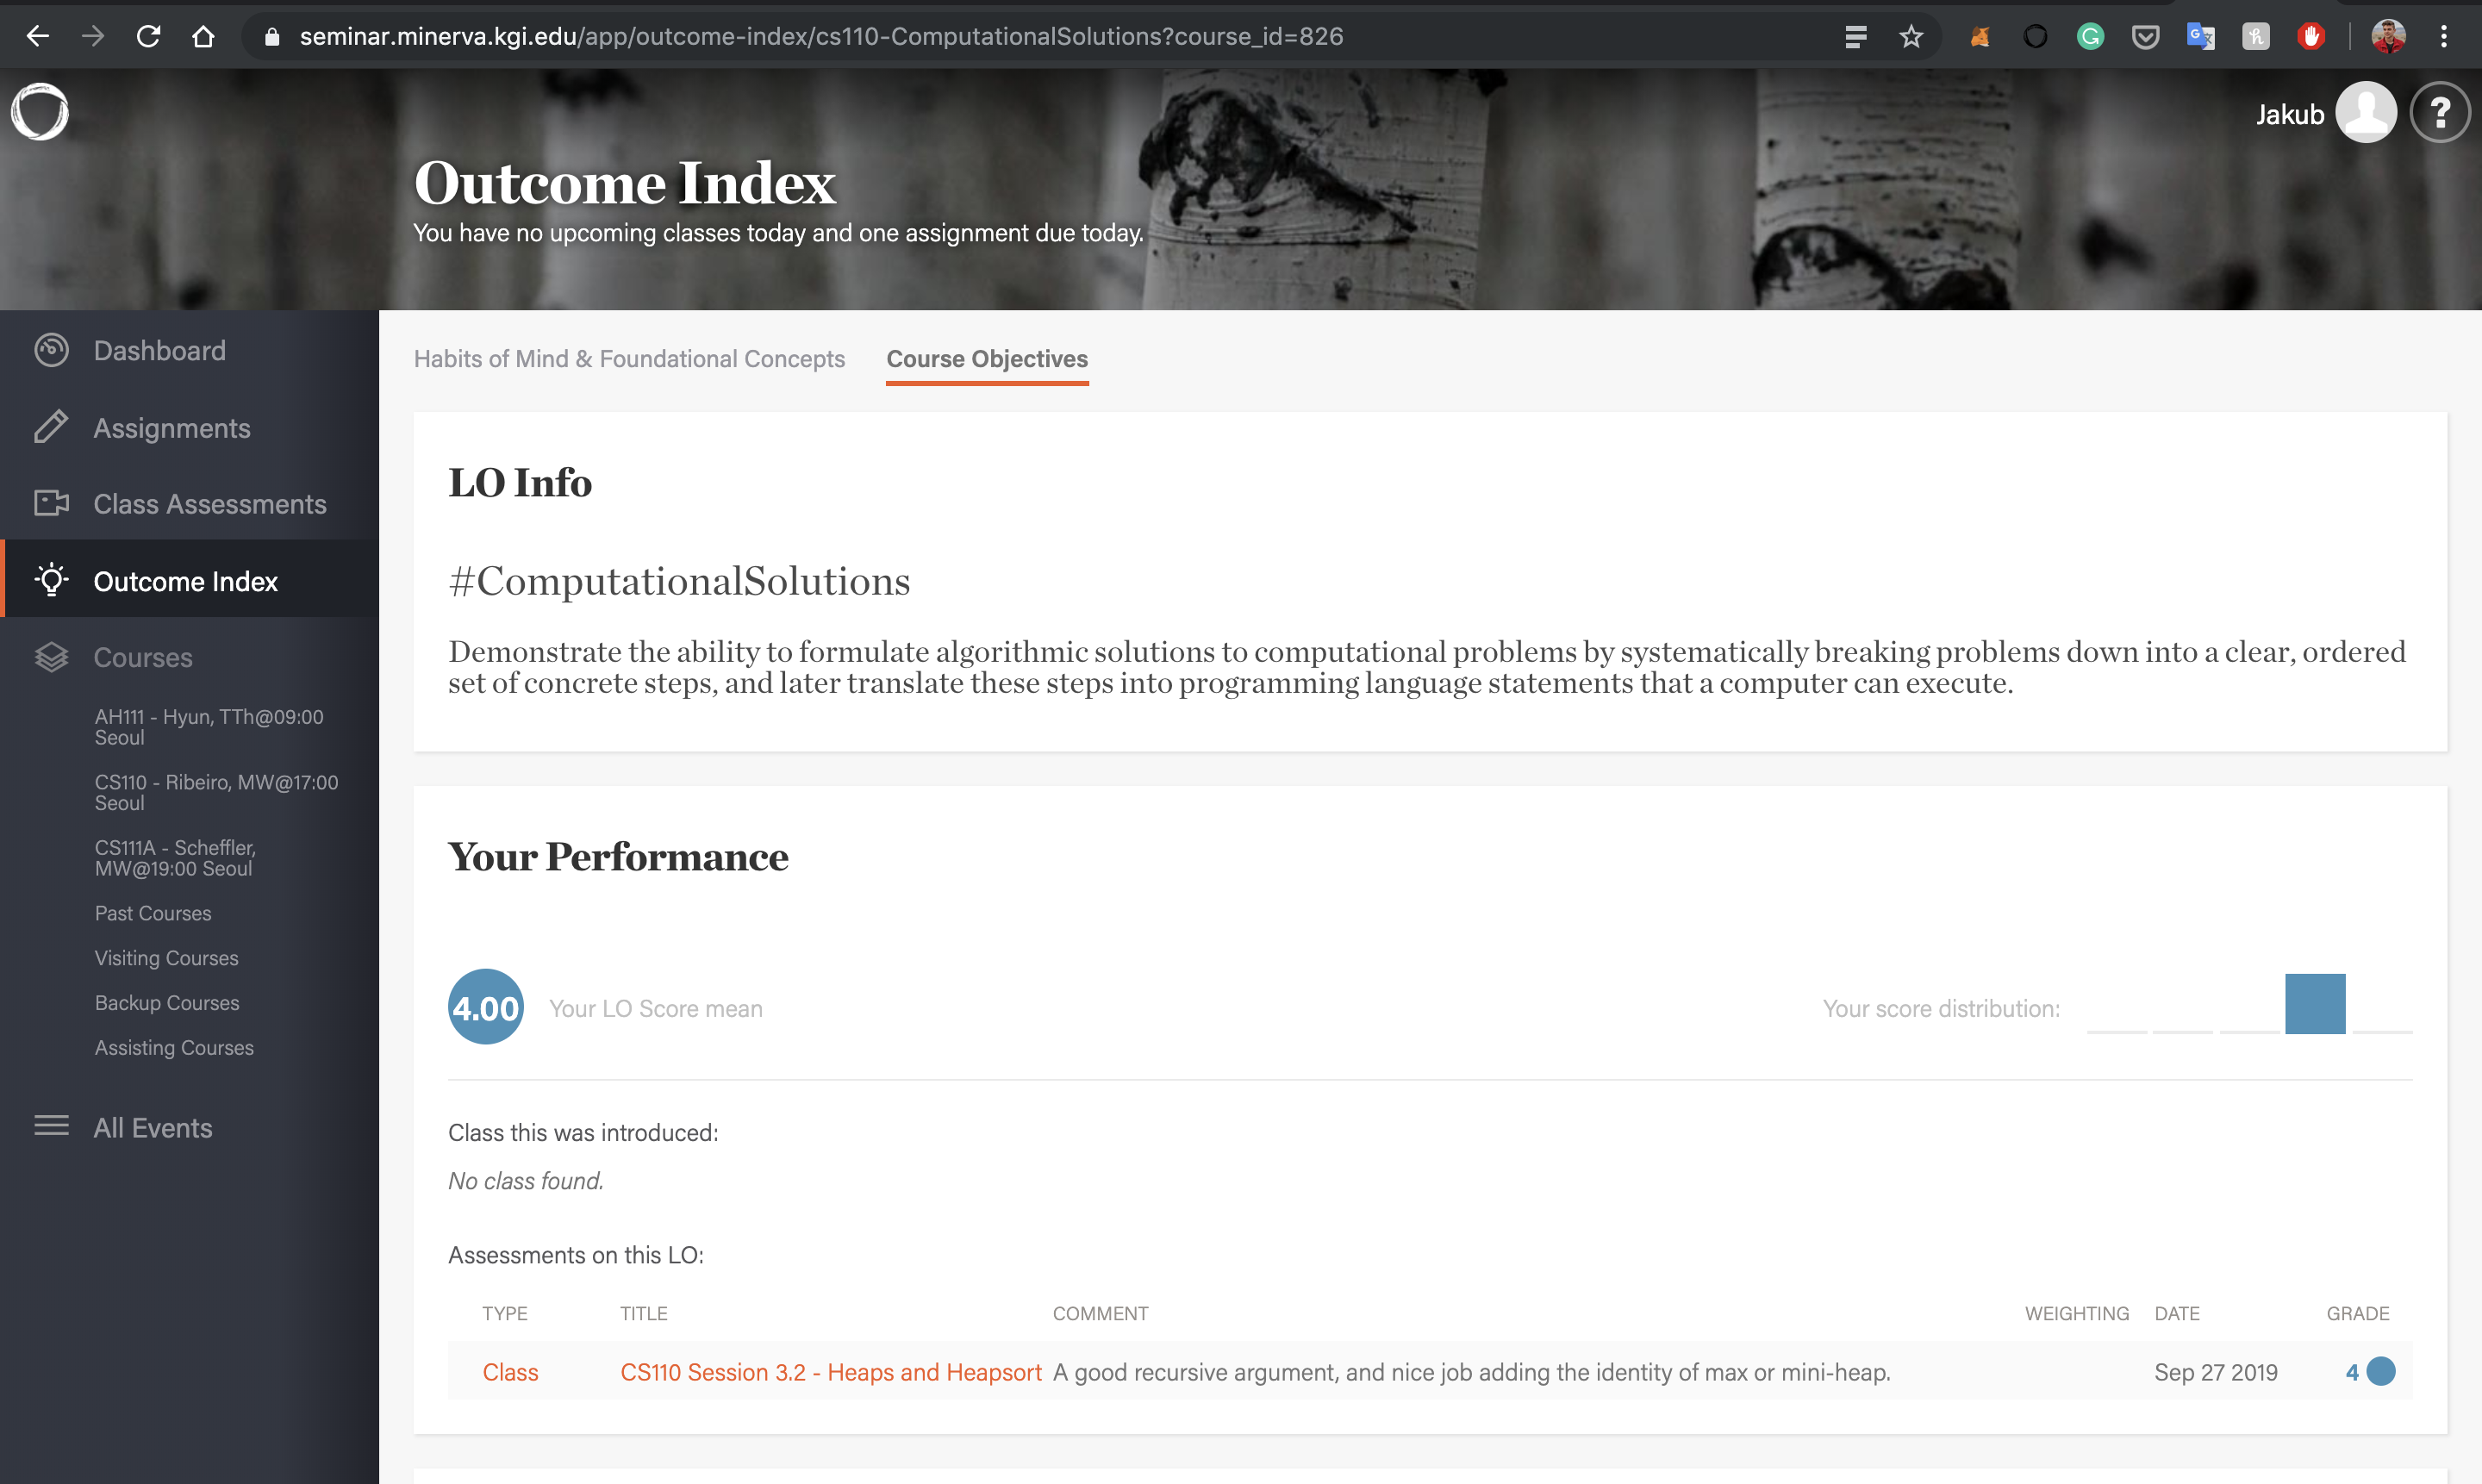

In [3]:
from IPython.display import Image
Image("#computationalsolutions screenshot.png")

In [4]:
#importing all the libraries I will be using
import matplotlib.pyplot as plt
%matplotlib inline
import random
import math
import numpy as np
import time 

## Question 2. [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Write a Python 3 implementation of the three-way merge sort discussed in class using the code skeleton below. You should also provide at least three test cases (possibly edge cases) that demonstrate the correctness of your code. Your output must be a sorted **Python list**.

In [5]:
threewmscounter=0
#First, we define the merge function, which is responsible for the combine part 
#of the divide&conquer algorithm
def threemerge(A, L, M, R): 
    global threewmscounter
    L.append(float("inf")) #sentinel value of left array = infinity
    M.append(float("inf")) #sentinel value of middle array = infinity
    R.append(float("inf")) #sentinel value of right array = infinity
    
    i=int(0) #first index of left array
    j=int(0) #first index of middle array
    z=int(0) #first index of right array

    for y in range(len(A)): #loop that goes through all the elements of the array
        threewmscounter+=1
        #if the first value from the left subarray is smaller than the first
        if L[i]==min(L[i], M[j], R[z]): #values from middle and right lists,
        #then the smaller value (one from the left subarray) is added to the array                                 
            A[y]=L[i] 
            i=i+1 #going to the next index of the array
        #analogically to the previous loop, if the first value from the   
        elif M[j]==min(L[i], M[j], R[z]): 
        #left subarray is smaller than the first values from middle and right lists,
        #then the smaller value (one from the middle subarray) is added to the array    
            A[y]=M[j] 
            j=j+1 #going to the next index of the array
            
        #again, if the value from the right subarray is the smallest 
        elif R[z]==min(L[i],M[j],R[z]): #of all the first values,
        #then the value from the right subarray will be added to the array                   
            A[y]=R[z] 
            z=z+1
            
    return A #returns sorted array

    
def threeWayMerge(A): 
    """Implements three-way marge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of 
    these data types)
    
    Output: a sorted Python list"""
    global threewmscounter
    if len(A)>1:   #checking if the algorithm reached the base condition, 
                   #which is whether or not the length of a subarray is equal to 1
        #defining values that the three-way merge sort will use
        threewmscounter+=1
        p=0 #first index
        s=len(A) #last index
        q=int(((p+s)/3)) #index labeling one-third length of the array 
                         #(because we divide our array into 3 equal subarrays)
        r=int(((2*(p+s))/3)) #index labeling two-third length of the array 
        
        #Creating 3 lists that will be used to compare the respective elements. 
        # And filling them with respective elements from the main array
        L=A[:q]
        M=A[q:r]
        R=A[r:]
        
        #Calling threeWayMerge function on each of the subarrays to perform the divide
        #part of the algorithm
        threeWayMerge(L)
        threeWayMerge(M)
        threeWayMerge(R)
        
        #Using the merge function to execute the conquer part of the algorithm 
        threemerge(A,L,M,R)
    return(A, threewmscounter)

A=[i for i in range(0, -11,-1)]
B=[0]
C=[8,8,8,3,3,3,5,5,5,6,6,6]
threeWayMerge(A), threeWayMerge(B), threeWayMerge(C)

(([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0], 32),
 ([0], 32),
 ([3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8], 69))

In [6]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3.  [(#SortingAlgorithms, #PythonProgramming, #CodeReadability, #ComputationalCritique] 

Implement a second version of a three-way merge sort that calls selection sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify what might be an appropriate threshold for the input array for applying selection sort.

In [20]:
etwmscounter=0
def Sort(A):
    global etwmscounter
    n=len(A) 
    for i in range(n-1):
        minidx=i
        etwmscounter+=1
        
        for j in range((i+1),n):
            etwmscounter+=1
            
            if A[j]<A[minidx]:
                minidx=j
                
        A[i],A[minidx]=A[minidx],A[i] 
    return(A)

def extendedThreeWayMerge(A):
    """Implements the second version of a three-way merge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    global etwmscounter
    n=len(A)
    #this condition comes from the complexity functions of merge sort 
    #and insertion sort. If the input size gives faster computation for 
    #the selection sort, then the divide part of merge sort is not executed,
    #and instead, the remaining subarrays are sorted using the insertion sort.
    if len(A)>15:  
    #This condition seems reasonable since when the size of the length is 
    #equal to less than 15,then it does not make sense to divide the list further -
    #- using the insertion sort is more efficient
        etwmscounter+=1
        p=0
        s=len(A)
        q=int(((p+s)/3))        
        r=int(((2*(p+s))/3))
        
        L=A[:q]
        M=A[q:r]
        R=A[r:]
        
        
        extendedThreeWayMerge(L)
        extendedThreeWayMerge(M)
        extendedThreeWayMerge(R)
        threemerge(A,L,M,R)
    else:
        Sort(A)
        etwmscounter+=1
        
    return(A,etwmscounter)

A=[i for i in range(0, -11,-1)]
B=[0]
C=[8,8,8,3,3,3,5,5,5,6,6,6]
extendedThreeWayMerge(A), extendedThreeWayMerge(B), extendedThreeWayMerge(C)

(([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0], 66),
 ([0], 67),
 ([3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8], 145))

In [8]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Bucket sort (or Bin sort) is an algorithm that takes as inputs an $n$-element array and the number of buckets, $k$, to be used during sorting.  Then, the algorithm distributes the elements of the input array into $k$-different buckets and proceeds to sort the individual buckets. Then, merges the sorted buckets to obtained the sorted array. Here is pseudocode for the BucketSort algorithm:

<img src="images/bucket.png" width="800" height="200">

The BucketSort above calls the function **GetBucketNum** (see the pseudocode below) to distribute all the elements of array $A$ into $k$-buckets.  Every element in the array is assigned a bucket number based on its value (positive or negative numbers). **GetBucketNum** returns the bucket number that corresponds to element $A[i]$.   It takes as inputs the element of the array, $A[i]$, the max and min elements in $A$, the size of the intervals in every bucket (e.g., if you have numbers with values between 0 and 100 numbers and 5 buckets, every bucket has an interval of size $20 = [100-0]/5$).  Notice that in pseudocode the indices of the arrays are from 1 to $n$. Thus, GetBucketNum consistently returns a number between 1 and $n$ (make sure you account for this in your Python program).

<img src="images/getbucketnum.png" width="800" height="200">

Write a Python 3 implementation of BucketSort that uses the selection sort algorithm for sorting the individual buckets in line 10 of the algorithm.

In [9]:
bscounter=0
def Sort(A):
    global bscounter
    n=len(A) 
    
    #running a loop for every element in the list that's being sorted
    for i in range(n-1): #setting the current minimum index to the first 
                         #element of the unsorted part of the list
        minidx=i 
        bscounter+=1
        
        for j in range((i+1),n): #running the second loop that will compare 
                                 #elements to the current minimum
            bscounter+=1
            
            if A[j]<A[minidx]: #if the jth element is smaller than current minimum
                minidx=j       #then new minimum index will be j
                
        A[i],A[minidx]=A[minidx],A[i] #substituting previous minimum with 
                                      #the new minimum       
    return(A) #returning the sorted list

def GetBucketNum(a, mn, mx, sz, k):
    global bscounter
    if a == mx: #if the element a of the list that's being sorted is the maximum 
                #element of the list
        j=k     #assigning the element from the list to the last bucket 
                #(k is number of buckets, hence kth bucket is the last one)
        bscounter+=1    
            
    elif a == mn: #if the element a is the minimum element, it's assigned to 
                  #the first bucket
        j=1
        bscounter+=1
        
    else: #otherwise, we are setting the a element to the first bucket and 
          #using the while statement, we will move it up until
          #it reaches the appropriate bucket
        j=1
        bscounter+=1
        
        while a > mn+(sz*j): #this while statement increases the j until 
                             #the a element reaches its bucket. 
            #The loop terminates when the element a is equal to the 
            #upper bound of a bucket, which is denoted by 
            #minimum+((size of the interval)*(number of the current bucket))
            j=j+1     
            bscounter+=1
    #returns the number of the bucket that the element has to be assigned to
    return(j) 


def bucketSort(A, k):
    """Implements BucketSort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these 
    data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    global bscounter
    mn=min(A) #mn is the value of the minimum element of the list
    mx=max(A) #mx is the value of the maximum element of the list
    sortedlist=[] #creating an empty list that will be used at 
                  #the end to append elements from the sorted buckets
    sz=np.ceil((mx-mn)/k) #setting the interval of the division of the 
                          #list - i.e. the size of the buckets 
    Buckets = [[] for i in range(k+1)] #creating a list and filling it with the 
                                       #k-number of empty lists (buckets)
    
    for i in range(len(A)):
        b=GetBucketNum(A[i], mn, mx, sz, k) #deciding which bucket to 
                                            #assign the ith element to
        Buckets[b].append(A[i]) #appending the ith element to the appropriate bucket
        bscounter+=1
   
    for i in range(k+1): #using insertion sort to sort the buckets
        Sort(Buckets[i])
        bscounter+=1
    
    #nested loop which will extract numbers from the sorted buckets and append them 
    #to the empty "sortedlist", which will be our output
    for i in range(1,k+1): 
        bscounter+=1
        for j in range(int(len(Buckets[i]))):
            sortedlist.append(Buckets[i][j])
            bscounter+=1
    return(sortedlist, bscounter)

A=[i for i in range(0, -11,-1)]
B=[0]
C=[8,8,8,3,3,3,5,5,5,6,6,6]
bucketSort(A,len(A)), bucketSort(B,len(B)), bucketSort(C,len(C))

(([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0], 94),
 ([0], 100),
 ([3, 3, 3, 5, 5, 5, 6, 6, 6, 8, 8, 8], 190))

In [10]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

 Implement a second version of the BucketSort algorithm. This time in line 10 of BucketSort use the Bucket sort recursively until the size of the bucket is less than or equal to k, the base case for the recursion.



In [11]:
ebscounter=0

def Sort2(A):
    global ebscounter
    n=len(A) 
    
    for i in range(n-1): #running a loop for every element in the list that's being
                         #sorted
        minidx=i #setting the current minimum index to the first element of the 
                 #unsorted part of the list
        ebscounter+=1
        
        for j in range((i+1),n): #running the second loop that will compare elements
                                 #to the current minimum
            ebscounter+=1
            
            if A[j]<A[minidx]: #if the jth element is smaller than current minimum
                minidx=j       #then new minimum index will be j
                
        A[i],A[minidx]=A[minidx],A[i] #substituting previous minimum with the 
                                      #new minimum       
    return(A) #returning the sorted list


def GetBucketNum2(a, mn, mx, sz, k):
    global ebscounter
    if a == mx:
        j=k
        ebscounter+=1
    elif a == mn:
        j=1
        ebscounter+=1
    else:
        j=1
        ebscounter+=1
        while a > mn+(sz*j):
            j=j+1
            ebscounter+=1
    return(j)


def extendedbucketSort(A,k):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of 
    these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    global ebscounter
    mn=min(A)
    mx=max(A)
    sortedlist=[]
    sz=np.ceil((mx-mn)/k)
    Buckets = [[] for i in range(k+1)]
    for i in range(len(A)):
        b=GetBucketNum2(A[i], mn, mx, sz, k)
        Buckets[b].append(A[i])
        ebscounter+=1
    for i in range(1,k):
        ebscounter+=1
        if len(Buckets[i])>1: #in the instructions of the assignments 
#there was another base condition. However, the algorithm didn't work
#with the one specified so I had to change it to another condition.
#In this version, the algorithm stops calling itself reursively when the  
#length of the bucket is equal to one, i.e. it contains only one element. 
            extendedbucketSort(Buckets[i],len(Buckets[i]))
        Sort2(Buckets[i])
    for i in range(k):
        ebscounter+=1
        for j in range(int(len(Buckets[i]))):
            sortedlist.append(Buckets[i][j])
            ebscounter+=1
    return(sortedlist, ebscounter)

A=[i for i in range(0, -11,-1)]
B=[0]
C=[8,8,8,3,3,3,5,5,5,6,6,6]
extendedbucketSort(A,len(A)), extendedbucketSort(B,len(B)), extendedbucketSort(C,len(C))

(([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1], 99),
 ([], 102),
 ([3, 3, 3, 5, 5, 5, 6, 6, 6], 215))

#algorithms: In this example, I had to use algorithmic thinking to come up with my new terminating condition on the line 58. To do so, I have studied the desired functionality of the algorithm and checked my hypotheses against multiple tests. 

In [12]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 6 [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), three-way merge sort, and the extended merge sort from (3) by producing a plot that illustrates how every running time and number of steps grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


1. 
Two Way Merge Sort = T(n) =$\ 2T(n/2)$+$\Theta(n)$ = $\ O(nlog_2n$) 

Three Way Merge Sort = T(n) =$\ 3T(n/3)$+$\Theta(n)$ = $\ O(nlog_3n$). If we generalize the running time of the k-way merge sort, its complexity will be $\ O(nlog_kn$), hence the complexity of the three way merge given above. 

Extended Three Way Merge Sort = $\ O(nlog_3n$). The complexity of this merge sort will be very similar to that of the regular three-way merge sort. However, the base condition gives a less steep growth curve.

2. For these graphs I used the worst-case scenario, so a situation in which the elements of a list are in an opposite order to the desired one. I have also counted a step only after every loop (e.g. I wouldn't count such an operation as finding a maximum element by max() function). 

In [13]:
#This is my old version of the two-way merge sort that I've created 
#for the 2.1 session. 
def old_merge(A, p, q, r):
    q=int(q) #the function was throwing an error because was thinking 
             #of these variables as floats,
    p=int(p) #hence change to integers
    r=int(r) 
    n1=int(q-p+1) #n1 is the length of the first (left) array
    n2=int(r-q) #n2 is the length of the second (right) array
    L=[0 for i in range(n1+1)] #creating left array of the length=n1 and 
                               #filling it with 0s
    R=[0 for i in range(n2+1)] #creating left array of the length=n2 and 
                               #filling it with 0s

    for i in range(0, n1+1): #iteration through all values in range from 0 to n1
        L[i]=A[p+i] #filling left subarray with actual values from the array
    
    for j in range(0, n2): #iteration through all values in range from 0 to n2
        R[j]=A[q+j+1] #filling right subarray with actual values from the array 
    
    L[n1]=float("inf") #sentinel value of left array = infinity
    R[n2]=float("inf") #sentinel value of right array = infinity
    i=int(0) #first index of left array
    j=int(0) #first index of rigth array
    
    for k in range(p, r+1): #loop that goes through all the elements of the array
        if L[i]<=R[j]: #comparing elements from left and right subarray 
            A[k]=L[i] #if the value from the left subarray is smaller than or equal
                      #to that in the right subarray, then the smaller value 
                      #(one from the left subarray) is added to the array
            i=i+1 #going to the next index of the array
        else: #if the value from the left subarray is smaller, 
              #then the value from the right subarray will be added to the array
            A[k]=R[j] 
            j=j+1
            
    return A #returns sorted array
    raise NotImplementedError()
    
def old_merge_sort(A,p,r):
    if p < r:
        q = (p+r)//2
        old_merge_sort(A,p,q)
        old_merge_sort(A,q+1,r)
        old_merge(A,p,q,r)
    return(A)

In [14]:
#Creating the two-way merge sort function. 
#This version is more efficient than my previous one that I've created for the 2.1 
#CS110 session. Moreover, this version only takes a list as an input so there is no
#need to especify the p, q, and r variables.

twowmscounter=0
#First, we define the merge function, which is responsible for the 
#combine part of the divide&conquer algorithm
def twomerge(A, L, R): 
    global twowmscounter
    L.append(float("inf")) #sentinel value of left array = infinity
    R.append(float("inf")) #sentinel value of right array = infinity
    
    i=int(0) #first index of left array
    j=int(0) #first index of right array

    for y in range(len(A)): #loop that goes through all the elements of the array
        twowmscounter+=1
        if L[i]==min(L[i], R[j]): #if the first value from the left subarray
            #is smaller than the first values from middle and right lists,
            A[y]=L[i] #then the smaller value (one from the left subarray) 
                      #is added to the array 
            i=i+1 #going to the next index of the array
            
        else: #again, if the value from the right subarray is the smallest 
              #of all the first values, 
            A[y]=R[j] #then the value from the right subarray will be added
                      #to the array
            j=j+1
            
    return A #returns sorted array

    
def twoWayMerge(A): 
    """Implements three-way marge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both
    of these data types)
    
    Output: a sorted Python list"""
    global twowmscounter
    if len(A)>1:   #checking if the algorithm reached the base condition, 
                   #which is whether or not the length of a subarray is equal to 1
        #defining values that the three-way merge sort will use
        twowmscounter+=1
        p=0 #first index
        s=len(A) #last index
        q=int((p+s)/2) #index labeling one-third length of the array 
                         #(because we divide our array into 3 equal subarrays)

        #Creating 3 lists that will be used to compare the respective elements. 
        # And filling them with respective elements from the main array
        L=A[:q]
        R=A[q:]
        
        #Calling threeWayMerge function on each of the subarrays to perform the
        #divide part of the algorithm
        twoWayMerge(L)
        twoWayMerge(R)
        
        #Using the merge function to execute the conquer part of the algorithm 
        twomerge(A,L,R)
    return(A, twowmscounter)

#analogies: After creating the three-way merge sort, I realized that my previous two-way merge was inefficient. I started thinking about how I could apply analogous way of solving the sorting problem, so that my two-merge does not require more elements than the list of interest. By doing so, I have improved the efficieny of my two-way merge algorithm, which can be seen on the graph below. 

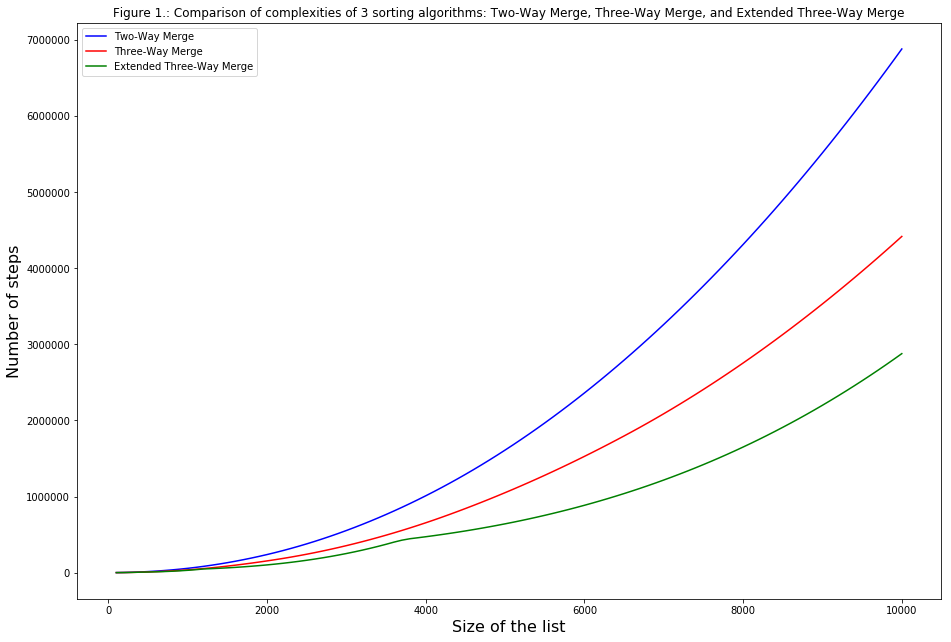

In [21]:
#Setting the counters to 0.
twowmscounter=0
threewmscounter=0
etwmscounter=0

inputs2=[] #Creating an empty list. This list will hold the lists to be sorted
#by the algorithm.
for i in range(1, 101): #Running a loop for 100 times
    inputs2.append([i for i in range(100*i, 0, -1)]) 
    #Creating 100 loops, each bigger by a hundred. 
    #The elements are in a reverse order so that we can check the worst case scenario  
twowaysteps=[] 
#Creating an empty array that will contain the number of steps the algorithm takes
for i in inputs2: #For every list that has to be sorted 
    twowaysteps.append(twoWayMerge(i)[1])#sorting the list and appending the number
    #of steps it took to the array holding number of steps for respective input sizes

#repeating the same process for next 2 algorithms     
inputs3=[]
for i in range(1, 101):
    inputs3.append([i for i in range(100*i, 0, -1)])    
threewaysteps=[]
for i in inputs3:
    threewaysteps.append(threeWayMerge(i)[1])

inputs3e=[]
for i in range(1, 101):
    inputs3e.append([i for i in range(100*i, 0, -1)])
extendedthreewaysteps=[]
for i in inputs3e:
    extendedthreewaysteps.append(extendedThreeWayMerge(i)[1])

#creating a figure    
fig = plt.figure() #defining a figure
ax = fig.add_axes([0,0,2,2])

#creating an empty array that will hold the input sizes. It will serve
#as the x-axis in our graph
numbers=[]
for item in inputs2:
    numbers.append(len(item))

#creating the graph and adding necessary descriptions    
plt.plot(numbers, twowaysteps, 'b')
plt.plot(numbers, threewaysteps, color='red')
plt.plot(numbers, extendedthreewaysteps, color='green')

ax.set_ylabel('Number of steps').set_fontsize(16)
ax.set_xlabel('Size of the list').set_fontsize(16)
ax.set_title("Figure 1.: Comparison of complexities of 3 sorting algorithms: Two-Way Merge, Three-Way Merge, and Extended Three-Way Merge")
ax.legend(('Two-Way Merge', 'Three-Way Merge', 'Extended Three-Way Merge'))

3. As we can see, the graph reflects the theoretical results we have discussed in the class. All of the functions grow logarithmically. The two-way merge sort has the steepest slope at any given point, since its growth function can be approximated by $\ y = xlog_2x$, comparing to three-way's $\ y = xlog_3$ or extended merge sort's $\ y = xlog_3x$. 

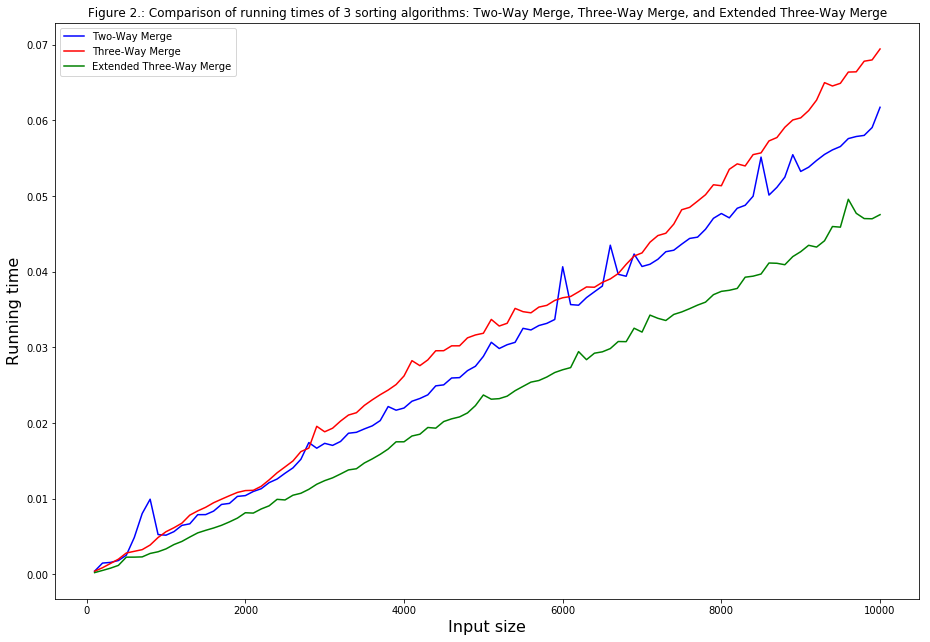

In [16]:
inputs2=[]
for i in range(1, 101):
    inputs2.append([i for i in range(100*i, 0, -1)])
twowaytime=[]
for i in inputs2:
    start_two = time.time()
    twoWayMerge(i)
    end_two = time.time()
    twowaytime.append(end_two-start_two)

inputs3=[]
for i in range(1, 101):
    inputs3.append([i for i in range(100*i, 0, -1)])    
threewaytime=[]
for i in inputs3:
    start_three = time.time()
    threeWayMerge(i)
    end_three = time.time()
    threewaytime.append(end_three-start_three)

inputs3e=[]
for i in range(1, 101):
    inputs3e.append([i for i in range(100*i, 0, -1)])
extendedthreewaytime=[]
for i in inputs3e:
    start_extthree = time.time()
    extendedThreeWayMerge(i)
    end_extthree = time.time()
    extendedthreewaytime.append(end_extthree-start_extthree)

numbers=[]
for item in inputs2:
    numbers.append(len(item))
    

fig = plt.figure() #defining a figure
ax = fig.add_axes([0,0,2,2])

plt.plot(numbers, twowaytime, 'b')
plt.plot(numbers, threewaytime, color='red')
plt.plot(numbers, extendedthreewaytime, color='green')

ax.set_ylabel('Running time').set_fontsize(16)
ax.set_xlabel('Input size').set_fontsize(16)
ax.set_title("Figure 2.: Comparison of running times of 3 sorting algorithms: Two-Way Merge, Three-Way Merge, and Extended Three-Way Merge")
ax.legend(('Two-Way Merge', 'Three-Way Merge', 'Extended Three-Way Merge'))     


## Question 7. [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort and recursive sort from (5) by producing a plot that illustrates how each running time grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


1. 
Two Way Merge Sort = $\ T(n)$ =$\ 2T(n/2)$+$\Theta(n)$ = $\ O(nlog_2n$)

Bucket Sort Complexity = $\ T(n)$ = $\ T(n^2)$+$\ n*O(2-1/n)$ = $\ O(n^2)$. The complexity of the insertion sort, which is being usedin my bucket sort algorithm is $\ O(n^2)$. In the worst case scenario, the algorithm runs the insertion sort through all the elements in the list and that's where the worst-case complexity of the bucket sort comes from. The same thing will happen for the extended bucket sort.

Extended (Recursive) Bucket Sort Complexity = $\ O(n^2)$

2. For these graphs I used the worst-case scenario, so a situation in which the elements of a list are in an opposite order to the desired one. I have also counted a step only after every loop (e.g. I wouldn't count such an operation as finding a maximum element by max() function). 

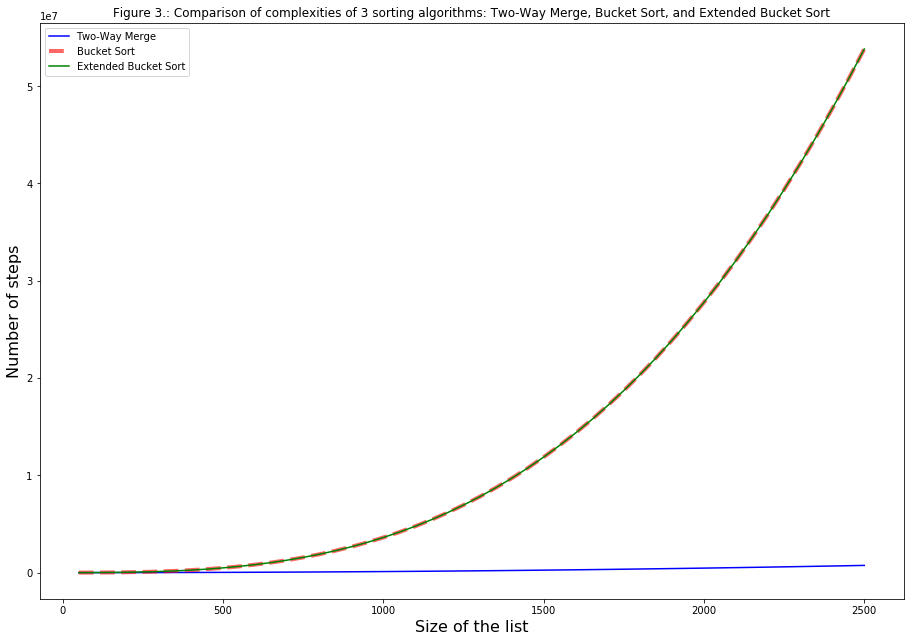

In [17]:
twowmscounter=0
bscounter=0
ebscounter=0

inputs2m=[]
for i in range(1, 51):
    inputs2m.append([i for i in range(50*i, 0, -1)])
twomergesteps=[]
for i in inputs2m:
    twomergesteps.append(twoWayMerge(i)[1])
    
inputsbucket=[]
for i in range(1, 51):
    inputsbucket.append([i for i in range(50*i, 0, -1)])
bucketsteps=[]
for i in inputsbucket:
    bucketsteps.append(bucketSort(i,len(i))[1])

inputsextbucket=[]
for i in range(1, 51):
    inputsextbucket.append([i for i in range(50*i, 0, -1)])
extbucketsteps=[]
for i in inputsextbucket:
    extbucketsteps.append(extendedbucketSort(i,len(i))[1])
    
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
numbers=[]
for item in inputs2m:
    numbers.append(len(item))
    
plt.plot(numbers, twomergesteps, 'b')
plt.plot(numbers, bucketsteps, color='red', linewidth=(4), alpha=.6,linestyle='--')
plt.plot(numbers, extbucketsteps, color='green')

ax.set_ylabel('Number of steps').set_fontsize(16)
ax.set_xlabel('Size of the list').set_fontsize(16)
ax.set_title("Figure 3.: Comparison of complexities of 3 sorting algorithms: Two-Way Merge, Bucket Sort, and Extended Bucket Sort")
ax.legend(('Two-Way Merge', 'Bucket Sort', 'Extended Bucket Sort'))

On the above graph, the red line of Bucket Sort is poorly visible, however it's due to the fact that it's exactly the same as the green line of Extended Bucket Sort. In other words, the green line covers the red line. I've made the red line thicker, decreased the opacity, and made it a dashed line to show that it is there.

#dataviz: As I've described above, I had to play with the graphs to show the properties of the fucntions. Doing so helped me understand that the complexity at worst case scenarios for both functions is the same. Before, I thought that one of my functions does not work and I've spent a lot of time debugging the code, but it was just the case that one of the lines was not visible because it was exactly underneath the other. 

3. As we can see, the graph reflects the theoretical results we have discussed in the class and the complexities I have listed in the first part of this question. Both bucket sorts grow exponentially with the complexity that could be approximated by the function $\ y = n^2$. Comparing the complexity of merge sort, the last sorting algorithm is much more efficient, since its complexity can be approximated by the function $\ y = xlog_2x$.

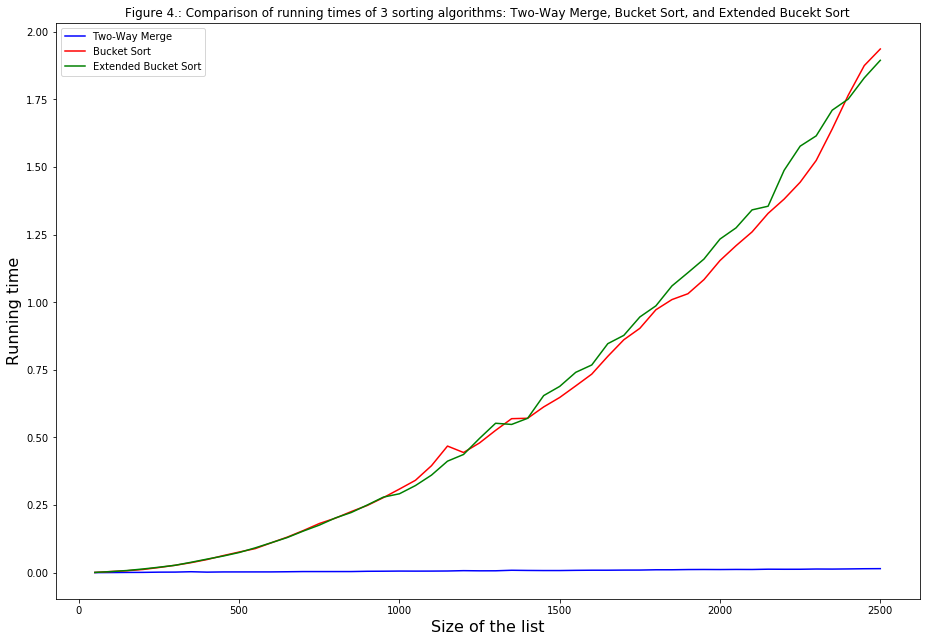

In [18]:
inputs2m=[]
for i in range(1, 51):
    inputs2m.append([i for i in range(50*i, 0, -1)])
twowaymergetime=[]
for i in inputs2m:
    start_two = time.time()
    twoWayMerge(i)
    end_two = time.time()
    twowaymergetime.append(end_two-start_two)

inputsb=[]
for i in range(1, 51):
    inputsb.append([i for i in range(50*i, 0, -1)])    
buckettime=[]
for i in inputsb:
    start_bucket = time.time()
    bucketSort(i, len(i))
    end_bucket = time.time()
    buckettime.append(end_bucket-start_bucket)

inputseb=[]
for i in range(1, 51):
    inputseb.append([i for i in range(50*i, 0, -1)])
extendedbuckettime=[]
for i in inputseb:
    start_extbucket = time.time()
    extendedbucketSort(i, len(i))
    end_extbucket = time.time()
    extendedbuckettime.append(end_extbucket-start_extbucket)

numbers=[]
for item in inputs2m:
    numbers.append(len(item))
    

fig = plt.figure() #defining a figure
ax = fig.add_axes([0,0,2,2])

plt.plot(numbers, twowaymergetime, 'b')
plt.plot(numbers, buckettime, color='red')
plt.plot(numbers, extendedbuckettime, color='green')

ax.set_ylabel('Running time').set_fontsize(16)
ax.set_xlabel('Size of the list').set_fontsize(16)
ax.set_title("Figure 4.: Comparison of running times of 3 sorting algorithms: Two-Way Merge, Bucket Sort, and Extended Bucekt Sort")
ax.legend(('Two-Way Merge', 'Bucket Sort', 'Extended Bucket Sort'))   

## [Optional challenge] Question 8 (#SortingAlgorithm and/or #ComputationalCritique) 

Implement k-way merge sort, where the user specifies k. Develop and run experiments to support a hypothesis about the “best” value of k.

In [19]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 